In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

# Data Preprocess

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## astype: chage column dtpye

In [6]:
df["Survivied"] = df["Survived"].astype("str")
df["Pclass"] = df["Pclass"].astype("str")

## Data normalization

In [7]:
k = 5*np.random.randn(1000) + 53.9
j = 4*np.random.randn(1000) + 32.7

df = pd.DataFrame({"K":k, "J":j})

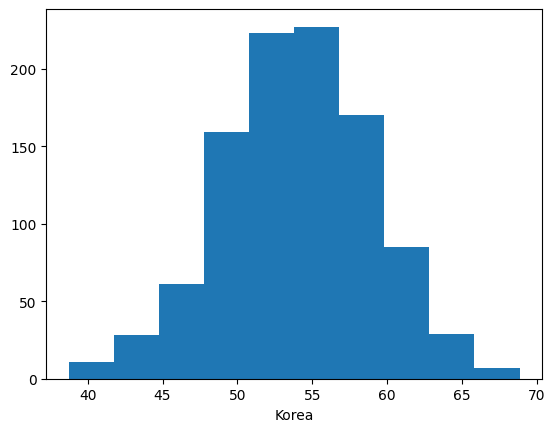

In [8]:
plt.hist(k)
plt.xlabel("Korea")
plt.show()

In [9]:
import scipy.stats as ss
### Z-score는 [x - mean(x)] / std(x) 역시 사용 가능
df["normalized_K"] = ss.zscore(k)
df["normalized_J"] = ss.zscore(j)

df

,K,J,normalized_K,normalized_J
0,57.032991,31.511306,0.612391,-0.291104
1,58.689724,35.131147,0.943499,0.603286
2,49.359688,33.778719,-0.921165,0.269128
3,50.724554,36.106439,-0.648389,0.844261
4,55.180584,31.176545,0.242176,-0.373817
...,...,...,...,...
995,62.301191,30.275416,1.665272,-0.596468
996,60.337654,37.399833,1.272847,1.163833
997,54.510119,26.628419,0.108179,-1.497568
998,49.829719,37.257881,-0.827227,1.128759


In [10]:
df["normalized_K2"] = (k - np.mean(k)) / np.std(k)
df["normalized_J2"] = (j - np.mean(j)) / np.std(j)

df

,K,J,normalized_K,normalized_J,normalized_K2,normalized_J2
0,57.032991,31.511306,0.612391,-0.291104,0.612391,-0.291104
1,58.689724,35.131147,0.943499,0.603286,0.943499,0.603286
2,49.359688,33.778719,-0.921165,0.269128,-0.921165,0.269128
3,50.724554,36.106439,-0.648389,0.844261,-0.648389,0.844261
4,55.180584,31.176545,0.242176,-0.373817,0.242176,-0.373817
...,...,...,...,...,...,...
995,62.301191,30.275416,1.665272,-0.596468,1.665272,-0.596468
996,60.337654,37.399833,1.272847,1.163833,1.272847,1.163833
997,54.510119,26.628419,0.108179,-1.497568,0.108179,-1.497568
998,49.829719,37.257881,-0.827227,1.128759,-0.827227,1.128759


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["normalized_K3"] = scaler.fit_transform(df[["K"]])
df["normalized_J3"] = scaler.fit_transform(df[["J"]])

df

,K,J,normalized_K,normalized_J,normalized_K2,normalized_J2,normalized_K3,normalized_J3
0,57.032991,31.511306,0.612391,-0.291104,0.612391,-0.291104,0.612391,-0.291104
1,58.689724,35.131147,0.943499,0.603286,0.943499,0.603286,0.943499,0.603286
2,49.359688,33.778719,-0.921165,0.269128,-0.921165,0.269128,-0.921165,0.269128
3,50.724554,36.106439,-0.648389,0.844261,-0.648389,0.844261,-0.648389,0.844261
4,55.180584,31.176545,0.242176,-0.373817,0.242176,-0.373817,0.242176,-0.373817
...,...,...,...,...,...,...,...,...
995,62.301191,30.275416,1.665272,-0.596468,1.665272,-0.596468,1.665272,-0.596468
996,60.337654,37.399833,1.272847,1.163833,1.272847,1.163833,1.272847,1.163833
997,54.510119,26.628419,0.108179,-1.497568,0.108179,-1.497568,0.108179,-1.497568
998,49.829719,37.257881,-0.827227,1.128759,-0.827227,1.128759,-0.827227,1.128759


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["mm_k"] = scaler.fit_transform(df[["K"]])
df["mm_j"] = scaler.fit_transform(df[["J"]])

df


,K,J,normalized_K,normalized_J,normalized_K2,normalized_J2,normalized_K3,normalized_J3,mm_k,mm_j
0,57.032991,31.511306,0.612391,-0.291104,0.612391,-0.291104,0.612391,-0.291104,0.607988,0.430867
1,58.689724,35.131147,0.943499,0.603286,0.943499,0.603286,0.943499,0.603286,0.663021,0.554256
2,49.359688,33.778719,-0.921165,0.269128,-0.921165,0.269128,-0.921165,0.269128,0.353097,0.508156
3,50.724554,36.106439,-0.648389,0.844261,-0.648389,0.844261,-0.648389,0.844261,0.398435,0.587501
4,55.180584,31.176545,0.242176,-0.373817,0.242176,-0.373817,0.242176,-0.373817,0.546455,0.419456
...,...,...,...,...,...,...,...,...,...,...
995,62.301191,30.275416,1.665272,-0.596468,1.665272,-0.596468,1.665272,-0.596468,0.782987,0.388739
996,60.337654,37.399833,1.272847,1.163833,1.272847,1.163833,1.272847,1.163833,0.717762,0.631588
997,54.510119,26.628419,0.108179,-1.497568,0.108179,-1.497568,0.108179,-1.497568,0.524184,0.264425
998,49.829719,37.257881,-0.827227,1.128759,-0.827227,1.128759,-0.827227,1.128759,0.368711,0.626750


## Conversion to normal distribution

In [13]:
k = 5*np.random.randn(1000)**2 + 53.9
j = 4*np.random.randn(1000)**2*-1+ 32.7
#k는 정규분포 제곱이라 왼쪽으로 치우치고
#j는 정규분포의 위의 역수라 오른쪽으로 치우침
#왼쪽 치우침 = 왜도 양수
#오른쪽 치우침 = 왜도 음수

df = pd.DataFrame({"K":k, "J":j})

In [14]:
print(ss.skew(df["K"]))
print(ss.skew(df["J"]))


2.688786887157092
-2.339051818423193


In [15]:
print("왜도에 따른 변수 변환식")

pd.DataFrame({"왜도":["양수", "음수"], "제곱근 변환":["sqrt(x)", "sqrt(max(x+1)-x)"], "로그 변환": ["log(x) 또는 log10(x)", "log(max(x+1)-x)또는 log10(max(x+1)-x)"], "역수변환":["1/x", "1/(max(x+1)-x)"]})

왜도에 따른 변수 변환식


,왜도,제곱근 변환,로그 변환,역수변환
0,양수,sqrt(x),log(x) 또는 log10(x),1/x
1,음수,sqrt(max(x+1)-x),log(max(x+1)-x)또는 log10(max(x+1)-x),1/(max(x+1)-x)


### log 변환

In [16]:
df["K1"] = np.log(df["K"])
df["J1"] = np.log(np.max(df["J"]+1) - df["J"])

print(ss.skew(df["K1"]))
print(ss.skew(df["J1"]))

2.06438334529622
0.46677966709955204


(array([717., 170.,  62.,  28.,  11.,   6.,   3.,   2.,   0.,   1.]),
 array([ 53.90001177,  60.12176108,  66.34351039,  72.5652597 ,
         78.78700901,  85.00875832,  91.23050763,  97.45225693,
        103.67400624, 109.89575555, 116.11750486]),
 <BarContainer object of 10 artists>)

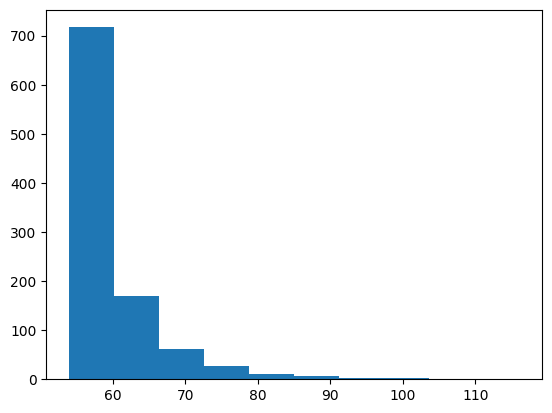

In [17]:
plt.hist(df["K"])

(array([630., 172., 109.,  43.,  24.,  10.,   6.,   3.,   2.,   1.]),
 array([3.9871307 , 4.06387789, 4.14062509, 4.21737228, 4.29411948,
        4.37086667, 4.44761387, 4.52436106, 4.60110826, 4.67785546,
        4.75460265]),
 <BarContainer object of 10 artists>)

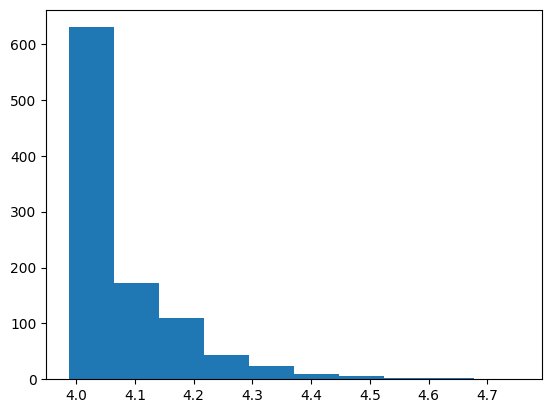

In [18]:
#이 그래프로는 정확히 알 수 없지만 흩어짐의 정도가 줄어든다
#분포의 차이로 이를 어느정도 확인할 수 있다
plt.hist(df["K1"])

### log10 변환

In [19]:
df["K2"] = np.log10(df["K"])
df["J2"] = np.log10(np.max(df["J"]+1) - df["J"])

print(ss.skew(df["K2"]))
print(ss.skew(df["J2"]))

2.064383345296222
0.4667796670995516


## cut

In [43]:
df["cut"] = pd.cut(x=df["K"],
                   bins = [50, 55, 60],
                   labels=["50~55", "55~60"],
                   include_lowest=True)     #True means smallest label <= x

In [44]:
df["cut"]
#범위 넘어가면 NaN

0      50~55
1        NaN
2      55~60
3        NaN
4      55~60
       ...  
995    55~60
996    55~60
997      NaN
998    55~60
999    55~60
Name: cut, Length: 1000, dtype: category
Categories (2, object): ['50~55' < '55~60']

In [45]:
df["qcut"] = pd.qcut(x=df["K"], q=5, labels=[0, 1, 2,3,4])

In [46]:
df["qcut"]

0      0
1      3
2      3
3      4
4      3
      ..
995    3
996    3
997    3
998    2
999    2
Name: qcut, Length: 1000, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [48]:
df["qcut"].value_counts()
#label 수 정해주면 자동으로 개수 맞춰서 분할

0    200
1    200
2    200
3    200
4    200
Name: qcut, dtype: int64

## PCA

In [79]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [81]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [82]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df = df.fillna(0)
#PCA를 위해 범주형 값 제거
#NaN 역시 0으로 대체

In [84]:
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)

In [96]:
print(p_score.shape)
print([round(i, 3) for i in pca.explained_variance_ratio_])
#explained_variance_ratio_는 변환된 각 차원의 기여도를 보여줌 
#1번째 차원만으로도 기존 정보의 96% 유지 가능

(891, 4)
[0.96, 0.036, 0.004, 0.0]


## 결측치 처리

In [136]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

In [137]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 행제거

In [140]:
df_1 = df.dropna(axis=0)

print(df_1.isnull().sum())
print(df.shape, df_1.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(891, 12) (183, 12)


### 결측치 대체

In [141]:
print(df["Age"].isnull().sum())
age_mean = df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)
print(df["Age"].isnull().sum())

177
0


### 최빈값 대체

In [142]:
from scipy.stats import mode

In [143]:
print(df["Embarked"].isnull().sum())
embarked_mode = df["Embarked"].mode()

df["Embarked"].fillna(embarked_mode[0], inplace=True)
print(df["Embarked"].isnull().sum())

2
0


### 인접 값 대체

In [145]:
df["Embarked"].fillna(method="ffill", inplace=True)
#ffill을 쓰면 윗값으로 bfill을 쓰면 아랫값으로 대체됨

### 그룹값으로 대체

In [147]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

In [149]:
print(df.groupby("Sex")["Age"].mean())
print()
print(df.groupby("Pclass")["Age"].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [152]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
#transform을 통해 mean연산을 Series전체에 적용가능

In [154]:
df.groupby("Pclass")["Age"].transform("mean")

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

## 이상치 처리

In [156]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

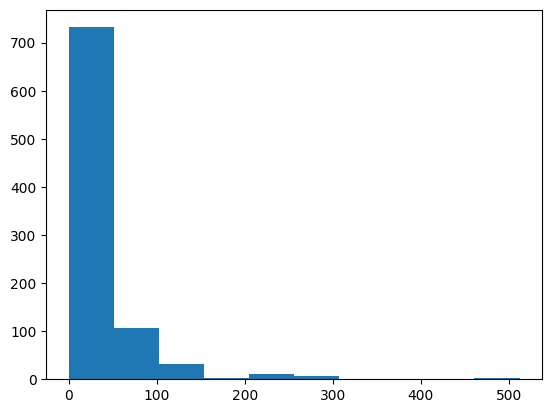

In [157]:
plt.hist(df["Fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe36eccbee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe36ecdb460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe36eccbc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe36ecdb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe36ecdbc40>],
 'means': []}

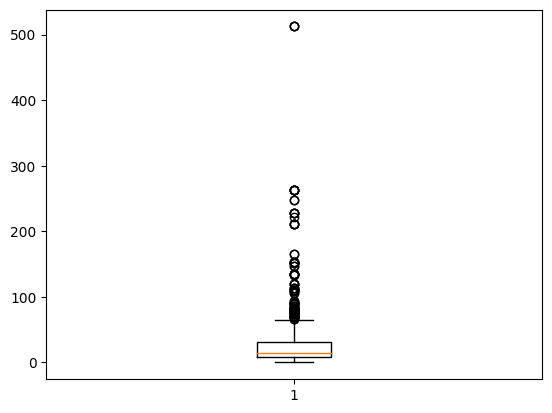

In [158]:
plt.boxplot(df["Fare"])

In [160]:
Q1 = df["Fare"].quantile(.25)
Q2 = df["Fare"].quantile(.5)
Q3 = df["Fare"].quantile(.75)
IQR = Q3-Q1

print(Q1)
print(Q2)
print(Q3)
print(IQR)

7.9104
14.4542
31.0
23.0896


In [162]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Checking outliers by IQR

In [170]:
condition = df["Fare"] > (Q3 + IQR * 1.5)
upperOutliers = df[condition]
condition = df["Fare"] < (Q1 - IQR * 1.5)
lowerOutliers = df[condition]

#이상치 체크 패턴에 주의


In [168]:
print(upperOutliers["Fare"].head())
print(lowerOutliers["Fare"].head())

1      71.2833
27    263.0000
31    146.5208
34     82.1708
52     76.7292
Name: Fare, dtype: float64
Series([], Name: Fare, dtype: float64)


## 평활화(smoothing)

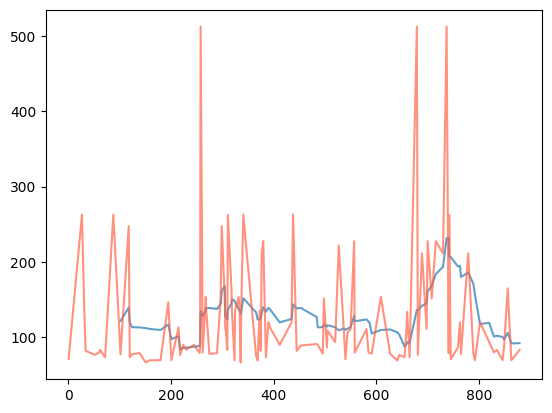

In [176]:
df = df[df["Fare"] > (Q3 + IQR * 1.5)]

df["sma"] = df["Fare"].rolling(10).mean()   #simple moving averagement

plt.plot(df["sma"], alpha=0.7)
plt.plot(df["Fare"], alpha=0.7, color="tomato")

### 지수가중이동평균

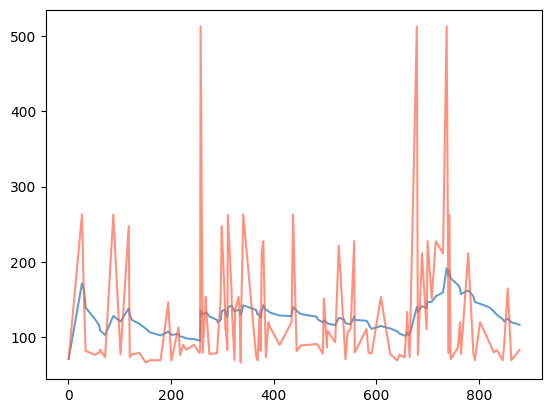

In [178]:
df["ewm"] = df["Fare"].ewm(10).mean(10)

plt.plot(df["ewm"], alpha=0.7)
plt.plot(df["Fare"], alpha=0.7, color="tomato")